<a href="https://colab.research.google.com/github/Keishin315/Keishin315/blob/main/signate_bigginer%E9%99%90%E5%AE%9A%E3%82%B3%E3%83%B3%E3%83%9A(rfc).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **signate CLI をインストールをインストール** 
トークンを取得して、コンペデータをダウンロード

In [1]:
pip install signate

     |████████████████████████████████| 138 kB 7.2 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=a48fbb22360140b3445861b8aee636bc599547e88c51792e2dc7545e1c3172bc
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is i

In [2]:
!signate token --email=jingxindi97@gmail.com --password=

The API Token has been downloaded successfully.


In [3]:
!signate list

  competitionId  title                                                                                      closing     prize                  submitters
---------------  -----------------------------------------------------------------------------------------  ----------  -------------------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                                       -                                        5415
             24  【練習問題】お弁当の需要予測                                                               -                                        6693
             27  【練習問題】Jリーグの観客動員数予測                                                        -                                        1557
            100  【練習問題】手書き文字認識                                                                 -           Knowledge                     204
            102  【練習問題】タイタニックの生存予測                                                         -           Knowledge                    1275
 

In [4]:
!signate download --competition-id=575

sample_submit.csv

test.csv

train.csv


Download completed.


# ライブラリをインポート

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# ファイルをダウンロードし、加工していく

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
sample_sub = pd.read_csv('sample_submit.csv')

In [11]:
train = train.drop('gameId',axis=1)

In [12]:
train_x = train.drop('blueWins',axis=1)
train_y = train['blueWins']

In [13]:
print(train_x,train_y)

      blueFirstBlood  blueKills  ...  blueTotalGold  blueTotalExperience
0                  0          7  ...          17398                17446
1                  1          8  ...          15925                14253
2                  1         14  ...          21457                19003
3                  1          6  ...          16364                17958
4                  1          3  ...          15451                16088
...              ...        ...  ...            ...                  ...
4920               1          8  ...          17489                17422
4921               1          7  ...          17296                16136
4922               0          7  ...          17287                17029
4923               0          2  ...          15283                16210
4924               1         11  ...          18722                18699

[4925 rows x 8 columns] 0       0
1       1
2       1
3       1
4       0
       ..
4920    0
4921    0
4922    1
4923    0

In [15]:
#scaling
scaler0 = MinMaxScaler()
scaler0.fit(train_x)
X_train = scaler0.transform(train_x)

In [16]:
print(train_x,train_y)

      blueFirstBlood  blueKills  ...  blueTotalGold  blueTotalExperience
0                  0          7  ...          17398                17446
1                  1          8  ...          15925                14253
2                  1         14  ...          21457                19003
3                  1          6  ...          16364                17958
4                  1          3  ...          15451                16088
...              ...        ...  ...            ...                  ...
4920               1          8  ...          17489                17422
4921               1          7  ...          17296                16136
4922               0          7  ...          17287                17029
4923               0          2  ...          15283                16210
4924               1         11  ...          18722                18699

[4925 rows x 8 columns]       blueWins
0            0
1            1
2            1
3            1
4            0
...      

# 訓練データと検証データに分割（７：３）

In [17]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X_train,train_y,test_size=0.3)

# **モデルの学習**
二つのモデル（RandomForestClassifer,ロジスティック回帰）

In [ ]:
#RandomForestClassifierでのパターン
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#ロジスティック回帰のパターン
model2 = LogisticRegression()
model2.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#RandomForestの精度検証
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.7442489851150202

In [ ]:
#ロジスティック回帰の精度検証
accuracy2 = accuracy_score(Y_test, y_pred2)
accuracy2

0.7388362652232747

# **提出ファイルの作成**

In [ ]:
test_gameId = test['gameId']

IndexError: ignored

In [ ]:
test = test.drop('gameId',axis=1)

In [ ]:
test = scaler0.transform(test)

In [ ]:
sub = model2.predict(test)

In [ ]:
sub = pd.DataFrame(sub)

In [ ]:
sub[1] = test_gameId

In [ ]:
sub[1] = sub[0]

In [ ]:
sub[0] = test_gameId

In [ ]:
print(sub)

         0  1
0     4925  0
1     4926  0
2     4927  0
3     4928  1
4     4929  0
...    ... ..
4920  9845  1
4921  9846  0
4922  9847  0
4923  9848  0
4924  9849  0

[4925 rows x 2 columns]


In [ ]:
sub.to_csv('sub5.csv',index = False)

# **主成分分析で学習データを次元削減をしてみる**

In [ ]:
#主成分分析
from sklearn.decomposition import PCA

pcamodel = PCA()
pcamodel.fit(X_train)

#データを主成分に変換
pca_cor = pcamodel.transform(X_train)

pca_cols = ["PC{}".format(x + 1) for x in range(8)]

pca_df = pd.DataFrame(pca_cor, columns = pca_cols)
print(pca_df)

           PC1       PC2       PC3  ...       PC6       PC7       PC8
0    -0.704243  0.131556 -0.010688  ... -0.187863 -0.010257  0.048289
1     0.362288  0.996308 -0.107165  ... -0.048944  0.003662 -0.035904
2    -0.554428  0.071812  0.309864  ...  0.008978 -0.027703 -0.084833
3    -0.688925  0.120270 -0.040447  ...  0.206443  0.065637  0.063157
4     0.209003  0.807492  0.117771  ... -0.070346  0.030563  0.003707
...        ...       ...       ...  ...       ...       ...       ...
3442 -0.575674  0.066786  0.359685  ... -0.085246 -0.098839 -0.166438
3443 -0.085706 -0.628616 -0.249129  ... -0.135363  0.009920 -0.042830
3444 -0.583668  0.316521 -0.199327  ... -0.205068  0.017729  0.040123
3445  0.917076  0.022988  0.041308  ... -0.056545 -0.102927 -0.046397
3446  0.260786  0.800791  0.138723  ...  0.000614 -0.004982 -0.063180

[3447 rows x 8 columns]


In [ ]:
#固有値
df_exp_var = pd.DataFrame([pcamodel.explained_variance_],columns=pca_cols)
df_exp_var.head()

#固有値の合計は成分数の13に一致
print(df_exp_var.sum(axis=1))

0    0.73907
dtype: float64


In [ ]:
#寄与率
df_exp_var_ratio = pd.DataFrame([pcamodel.explained_variance_ratio_],columns=pca_cols)
df_exp_var_ratio.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.467208,0.29671,0.10467,0.055999,0.038782,0.0231,0.007262,0.006269


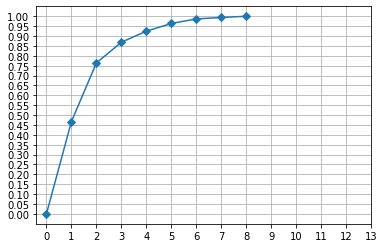

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cum_exp_var_ratio = np.hstack([0, pcamodel.explained_variance_ratio_]).cumsum()
plt.plot(cum_exp_var_ratio, 'D-')
plt.xticks(range(14))
plt.yticks(np.arange(0,1.05,0.05))
plt.grid()
plt.show()

In [ ]:
pca = PCA(n_components=0.95)              # 特徴量の成分を95％まで削減する
X_train_pca = pca.fit_transform(X_train)  # 訓練データに適応させる
X_test_pca = pca.transform(X_test)        # テストデータに適応させる
print("もとの訓練データ",X_train.shape[1])          # もとの特徴量の数
print("次元削減後の訓練データ",X_train_pca.shape[1]) # 次元削減後の特徴量の数

もとの訓練データ 8
次元削減後の訓練データ 5


In [ ]:
#次元削減後ロジスティック回帰のパターン
model = LogisticRegression()
model.fit(X_train_pca,train_y)
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(test_y, y_pred)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7706359945872802

In [ ]:
#次元削減後のランダムフォレストランダムフォレスト
model4 = RandomForestClassifier()
model4.fit(X_train_pca,train_y)
y_pred4 = model4.predict(X_test_pca)
accuracy4 = accuracy_score(test_y, y_pred4)
print(accuracy4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7401894451962111


**過去の提出データによるアンサンブル学習**

In [ ]:
sub5 = pd.read_csv('sub5.csv')
sub1 = pd.read_csv('sub1.csv')
sub3 = pd.read_csv('sub3.csv')
sub4 = pd.read_csv('sub4.csv')

In [ ]:
sub0 = sub1+sub3+sub4+sub5

In [ ]:
sub0 = sub0/4

In [ ]:
for i in range(4925):
  if sub0.iloc[i,1] >= 0.5:
    sub0.iloc[i,1] = 1
  else:
    sub0.iloc[i,1] = 0

In [ ]:
sub0.to_csv('sub0.csv')

In [ ]:
sub0 = sub0.astype('int')